# Reproject Vector Data

## Data in different CRS

Often when data do not line up properly, it is because they are in different CRS. You will learn how to reproject data from 1 CRS to another - so that the data line up properly.

## Working with spatial data from different sources

You often need to gather spatial datasets from different sources and/or data that cover different spatial extents. Spatial data from different sources and that cover different extents are often in different CRS.

Some reasons for data being in different CRSs include:
1. The data are stored in a particular CRS convention used by the data provider which might be a federal agency, or a state planning office.
2. THe data are stored in a particular CRS that is customised to a region. For instane, many states prefer to use a State Plane projection customised for that state.

![projection](projections.jpg)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import earthpy as et

# Setting plotting style for the notebook
sns.set_style("white")
sns.set(font_scale=1.5)

# Set work dir & get data
data = et.data.get_data("spatial-vector-lidar")
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

In [2]:
# Import the data
sjer_roads_path = os.path.join("data", "spatial-vector-lidar", "california", 
                               "madera-county-roads", "tl_2013_06039_roads.shp")
sjer_roads = gpd.read_file(sjer_roads_path)

# aoi stands for area of interest
sjer_aoi_path = os.path.join("data", "spatial-vector-lidar", "california", 
                             "neon-sjer-site", "vector_data", "SJER_crop.shp")
sjer_aoi = gpd.read_file(sjer_aoi_path)

# View the Coordinate Reference System of both layers 
print(sjer_roads.crs)
print(sjer_aoi.crs)

{'init': 'epsg:4269'}
{'init': 'epsg:32611'}


To plot the data together, they need to be in the same CRS. You can change the CRS which means you are reproject the data from 1 CRS to another CRS using the geopandas method:

to_crs(specify-crs-here)

The CRS can be specified using an EPSG code - as follows:

epsg=4326

IMPORTANT: When you reproject data you are modifying it. Thus you are introducing some uncertainty into your data. WHIle this is a slightly less important issue when working with vector data (compared to raster). It's important to consider.

Often you may consider keeping the data that you are doing the analysis on in the correct projection that best relates spatially to the area that you are working in. I.e. use the CRS that best minimises errors in distance/area etc. based on your analysis

c:\programdata\miniconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


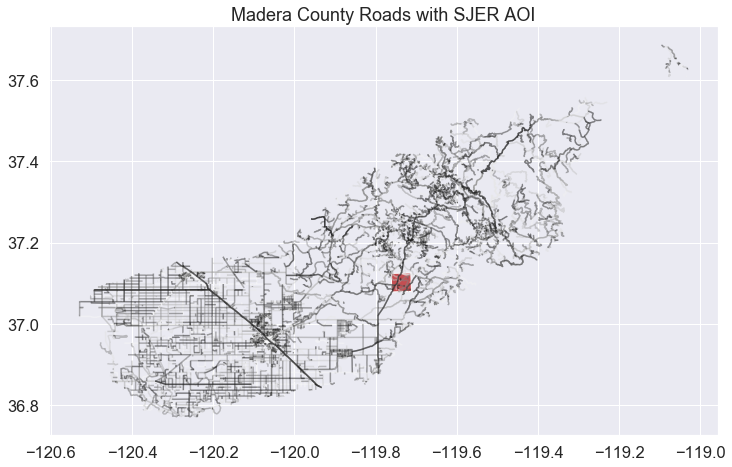

In [3]:
# Reproject the aoi to match the roads layer
sjer_aoi_wgs84 = sjer_aoi.to_crs(epsg=4269)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

sjer_roads.plot(cmap="Greys", ax=ax, alpha=.5)
sjer_aoi_wgs84.plot(ax=ax, markersize=10, color="r")

ax.set_title("Madera County Roads with SJER AOI");

Let's try this process again but using some census data boundaries.

## Import US Boundaries - Census Data

There are many good sources of boundary base layers that you can use to create a basemap. Some Python packages even have these base layers built in to support quick and efficient mapping. You will use boundary layers for the US, provided by the US Census Bureau.

It is useful to have shapefiles to work with because you can add additional attributes to them if need be - for project specific mappig.

## Read US boundary file

You will use the geopandas .read_file() function to import the /usa-boundary-layers/US-State-Boundaries-Census-2014 layer into Python. This layer contains the boundaries of all continental states in the US. Please note that these data have been modified and reprojected from the origional data downloaded from the Census website.

In [4]:
# IMport data into geopandas dataframe
state_boundary_us_path = os.path.join("data", "spatial-vector-lidar",
                                     "usa", "usa-states-census-2014.shp")

state_boundary_us = gpd.read_file(state_boundary_us_path)

# View data structure
type(state_boundary_us)

geopandas.geodataframe.GeoDataFrame

In [5]:
# View the first few lines of the data
state_boundary_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


Next, plot the US states data. Below you use geopandas to plot your geodataframe. Also notice that you are using ax.set_axis_off() to hide the x, y axis of our plot.

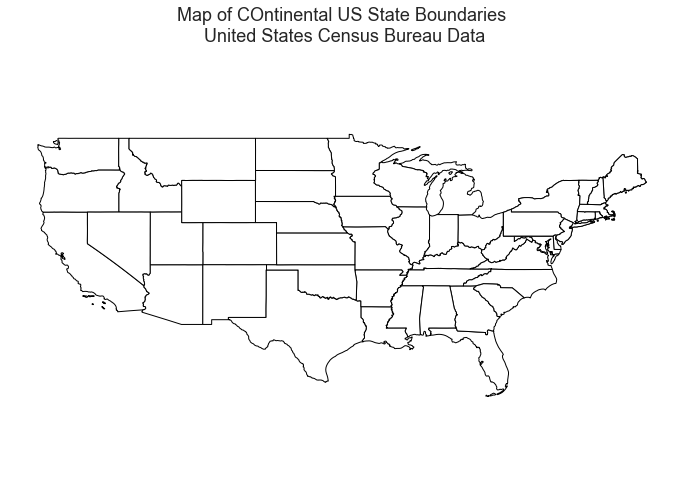

In [6]:
# Plot the data
fig, ax = plt.subplots(figsize = (12, 8))
state_boundary_us.plot(ax=ax, facecolor="white", edgecolor="black")

# Add title to map
ax.set(title="Map of COntinental US State Boundaries\n United States Census Bureau Data")

# Turn off the axis
plt.axis("equal")
ax.set_axis_off()

plt.show()

## U.S. boundary layer

You can add a boundary layer of the US to your map to make it look nicer. You will import data/week5/usa-boundary-layer/US-Boundary-Dissolved-States. If you specify a thicker line width using linewidth=4 for the border layer, it will make our map visually pop!

In [7]:
# Import US country boundary data
country_boundary_us_path = os.path.join("data", "spatial-vector-lidar",
                                       "usa", "usa-boundary-dissolved.shp")
country_boundary_us = gpd.read_file(country_boundary_us_path)

type(country_boundary_us)

geopandas.geodataframe.GeoDataFrame

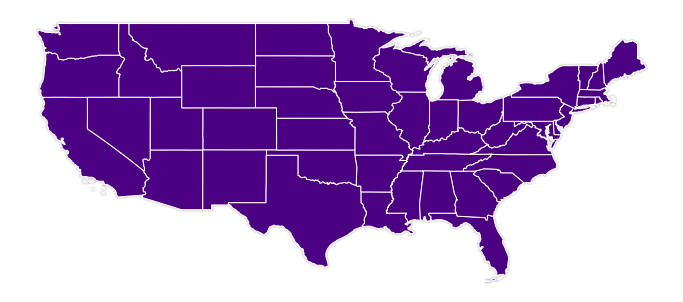

In [8]:
# Plot data
fig, ax = plt.subplots(figsize = (12, 7))
country_boundary_us.plot(ax=ax,
                        alpha=.1,
                        edgecolor="black",
                        color="white",
                        linewidth=4)

state_boundary_us.plot(ax = ax,
                      color = "indigo",
                      edgecolor = "white",
                      linewidth = 1)
ax.set_axis_off()
plt.show()

Next, add the SJER study area site locations to your map.

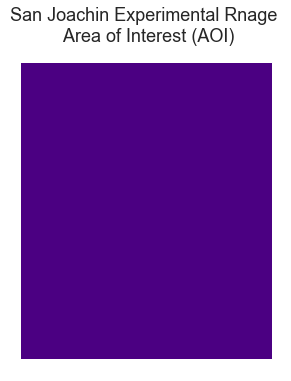

In [9]:
# Plot the data
fig, ax = plt.subplots(figsize = (6,6))

sjer_aoi.plot(ax=ax, color = "indigo")
ax.set(title = "San Joachin Experimental Rnage \n Area of Interest (AOI)")

ax.set_axis_off()
plt.show()

The SJER AOI layer plots nicely. Next, add it as a layer on top of the US states and boundary layers in your basemap plot.

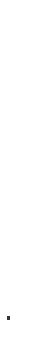

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

country_boundary_us.plot(ax=ax,
                        edgecolor="black",
                        color="white",
                        linewidth=3,
                        alpha=.8)

state_boundary_us.plot(ax=ax,
                      color="white",
                      edgecolor="gray")

sjer_aoi.plot(ax=ax, color="indigo")

# Turn off axis
ax.set_axis_off()
plt.show()

This looks off, let's check the CRS (.crs) of both datasets.

In [11]:
# View CRS of each layer
print(sjer_aoi.crs)
print(country_boundary_us.crs)
print(state_boundary_us.crs)

{'init': 'epsg:32611'}
{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


## CRS Units - View Object Extent

Next, let's view the extent or spatial coverage for the sjer_aoi spatial object compared to the state_boundary_us object.

In [12]:
# View spatial extent for both layers
print(sjer_aoi.total_bounds)
print(state_boundary_us.total_bounds)

[ 254570.567      4107303.07684455  258867.40933092 4112361.92026107]
[-124.725839   24.498131  -66.949895   49.384358]


Note the difference in the units for each object. The extent for state_boundary_us is in lat and long which yields smaller numbers representing decimal degree units. Our AOI boundary point is in UTM, is represented in meters.

Most importantly the 2 extents DO NOT OVERLAP. Yet you know that your data should overlap.

## Reproject vector data

You have to modify or reproject the data so they are all in the same CRS. You can use .to_crs() function to reproject your data. When you reproject the data, you specify the CRS that you wish to transform your data to. This CRS contains the datum, units and other info that Python needs to reproject our data.

THe to_crs() function requires 2 inputs:
1. the name of the object that you wish to transform
2. CRS that you wish to transform that object to - - this can be in EPSG format or an entire project 4 string. In this case you can use the crs value from the state_boundary_us object: .to_Crs(state_boundary_us.crs)

* Data Tip: .to_crs() will only work if your original spatial object has a CRS assigned to it AND if that CRS is the correct CRS!

Let's reproject our point layer into the geograhic - lat and long WGS84 coordinate reference system (CRS).

In [13]:
# Reproject the aoi to the same CRS as the state_boundary_use object
sjer_aoi_WGS84 = sjer_aoi.to_crs(state_boundary_us.crs)

# View CRS of new reprojected layer
print(sjer_aoi.total_bounds)
print("sjer_aoi crs:", sjer_aoi_WGS84.crs)
print("state boundary crs:", state_boundary_us.crs)

[ 254570.567      4107303.07684455  258867.40933092 4112361.92026107]
sjer_aoi crs: {'init': 'epsg:4326'}
state boundary crs: {'init': 'epsg:4326'}


c:\programdata\miniconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [15]:
# Reproject using the full proj.4 string copied from spatialreference.org
sjer_aoi_WGS84_2 = sjer_aoi.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

c:\programdata\miniconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


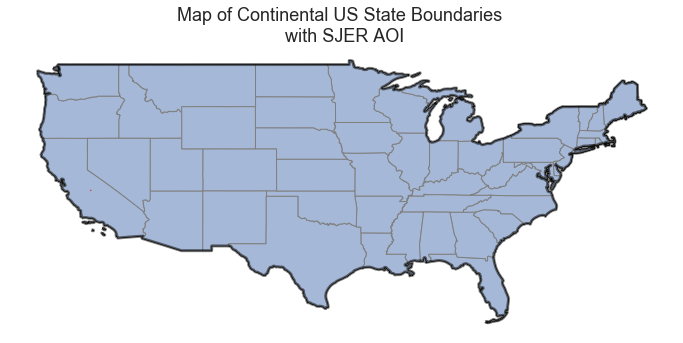

In [16]:
fig, ax = plt.subplots(figsize = (12, 8))

state_boundary_us.plot(ax=ax,
                      linewidth=1,
                      edgecolor="black")

country_boundary_us.plot(ax=ax,
                        alpha=.5,
                        edgecolor="black",
                        color="white",
                        linewidth=3)

sjer_aoi_WGS84.plot(ax=ax,
                   color="springgreen",
                   edgecolor="r")

ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")

ax.set_axis_off()
plt.show()

It's hard to see the tiny extent box on the map of the entire US: Try to zoom in on just a small portion of the map to better see the extent. To do this you can adjust the x and y limits as follows:

ax.set(xlim=[minx, maxx], ylim=[miny, maxy])

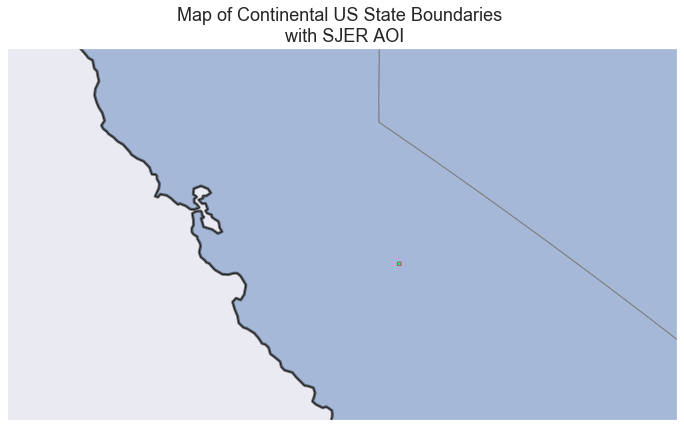

In [19]:
# Zoom in on just the area
fig, ax = plt.subplots(figsize = (12, 8))

state_boundary_us.plot(ax=ax,
                      linewidth=1,
                      edgecolor="black")

country_boundary_us.plot(ax=ax,
                        alpha=.5,
                        edgecolor="black",
                        color="white",
                        linewidth=3)

sjer_aoi_WGS84.plot(ax=ax,
                   color="springgreen",
                   edgecolor="r")

ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")
ax.set(xlim=[-125, -116], ylim=[35, 40])

# Turn off axis
ax.set(xticks = [], yticks = []);

The plot worked this time however now, the AOI boundary is a polygon and it's too small to see on the map. Let's convert the polygon to a polygon CENTROID (a point) and plot again. If zour data are represented as a point you can change the point size to make it more visible.

To do this, you'll access the centroid attribute of your AOI polygon using .centroid.

In [20]:
# Grab the centroid x, z location of the aoi and turn it into a new spatial object.
AOI_point = sjer_aoi_WGS84["geometry"].centroid
type(AOI_point)

geopandas.geoseries.GeoSeries

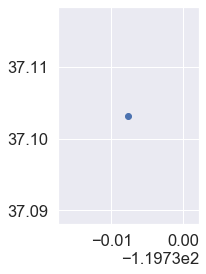

In [21]:
sjer_aoi_WGS84["geometry"].centroid.plot();

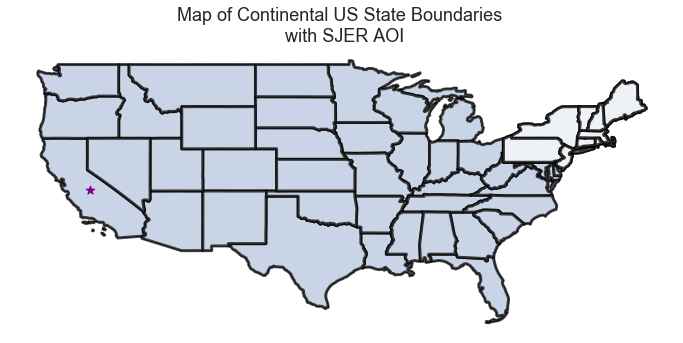

In [26]:
fig, ax = plt.subplots(figsize = (12, 7))

state_boundary_us.plot(ax=ax,
                      linewidth=1,
                      edgecolor="black")

state_boundary_us.plot(ax=ax,
                      alpha=.7,
                      edgecolor="black",
                      color="white",
                      linewidth=3)

AOI_point.plot(ax=ax,
              markersize=80,
              color="purple",
              marker="*")

ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")

# TUrn off axis
ax.set_axis_off();